In [3]:
'''
    Binary-Classification using logistic regression (Coursera - assignment 2)
    Python Implementation.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize

In [4]:
def mapFeature(x1, x2):
    '''
        MAPFEATURE Feature mapping function to polynomial features

        MAPFEATURE(X1, X2) maps the two input features
        to quadratic features used in the regularization exercise.

        Returns a new feature array with more features, comprising of 
        X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

        Inputs X1, X2 must be the same size
    '''
    degree = 6 # setting the polynomial of degree 6 for a better hypothesis.
    out = np.ones(len(x1)).reshape(-1,1);
    
    for i in range(1,degree+1):
        for j in range(i+1):
            l1 = np.array(list(map(lambda x:pow(x,(i-j)), x1))).reshape(-1,1);
            l2 = np.array(list(map(lambda x:pow(x,j), x2))).reshape(-1,1);
            out = np.c_[out, np.multiply(l1,l2)];
    return out

In [5]:
def sigmoid(z):
    '''
        Calculates the sigmoid value for any vector/matrix/scaler.
    '''
    z = np.array(z);
    g = np.zeros(z.shape);
    g = 1/(1 + np.exp(-z));
    
    return g

In [6]:
def predict(theta, X):
    '''
        The predict function gives the final predicted vector.
        
        Arguments include the optimised value of vector theta.
        Training/test set X.
    '''
    predictionVector = np.array((sigmoid(X@theta) >= 0.5).astype(int));
    return predictionVector;

In [7]:
def costFunctionReg(theta,X,y,lambda_):
    '''
        Cost Function

        This function computes the cost for implementing logistic regression and contains
        the gradient descent implementation too.

        The code has been vectorised and uses regularisation using the regularisation parameter 'reg_param'
        as an argument.
    '''
    m = y.size  # number of training examples
    n = theta.size

    # You need to return the following variables correctly 
    cost = 0
    grad = np.zeros(theta.shape)

    # Compute h
    h = sigmoid(np.dot(X, theta)).reshape(-1,1)
    
    # Compute cost
    cost = (-1/m) * (np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h))) + (lambda_/(2*m)) * (np.dot(theta[1:].T, theta[1:]))
    
    # Compute grad for j = 0
    grad[0] = (1/m) * (np.dot((X[:, 0]).reshape(-1,1).T, h-y))
    
    # Compute grad for j >= 1
    for i in range(1, n):
        grad[i] = (1/m) * (np.dot((X[:, i]).reshape(-1,1).T, h-y)) + (lambda_/m) * (theta[i]);
    
    return cost, grad



In [8]:
'''
    Load the dataset
'''
filename = 'ex2data2.txt'
data = pd.read_csv(
                   filename,
                   sep=',',
                   comment='#',
                   na_values=['Nothing'],
                   names=['Microchip test 1', 'Microchip test 2', 'Approval Status']
                  );

# Building the training set and predicted output vector
training_set = np.array(data[['Microchip test 1', 'Microchip test 2']]);
approval_status = np.array(data[['Approval Status']]);

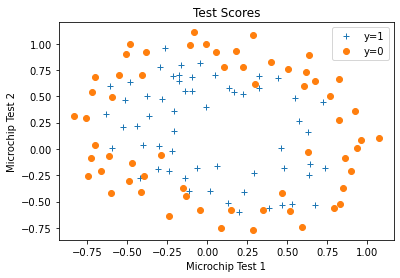

In [9]:
'''
    Plotting the dataset
'''

pos = [i for i, x in enumerate(approval_status) if x == 1]
neg = [i for i, x in enumerate(approval_status) if x == 0]

plt.plot(training_set[pos, 0], training_set[pos, 1], marker='+', linestyle="None", label = 'y=1');
plt.plot(training_set[neg, 0], training_set[neg, 1], marker='o', linestyle="None", label = 'y=0');
plt.xlabel("Microchip Test 1");
plt.ylabel("Microchip Test 2");
plt.title("Test Scores");
plt.legend(loc = "upper right");
plt.show()

This is how the data looks like on a grid which tells us that we need a complex decision boundry.

In [10]:
'''
    Declaring Important Variables and modifying training set by introducing extra features using mapFeature
    function.
'''
X = mapFeature(training_set[:,0], training_set[:,1]);
y = approval_status;
initial_theta = np.zeros(X.shape[1]).reshape(-1,1);

# Setting regularization parameter reg_param to 1
reg_param = 1;

m = len(X);

cost, grad = costFunctionReg(initial_theta, X, y, reg_param);

# to check with reg_param = 10 and theta of all ones.
# cost, grad = costFunctionReg(X, y, np.ones(X.shape[1]).reshape(-1,1), reg_param);

The Expected Cost Value is: <br>0.693

In [11]:
# Value returned by cost function
print(cost)

[[0.69314718]]


The expected value of grad for the first 5 elements is: <br>
0.0085 <br>
0.0188 <br>
0.0001 <br>
0.0503 <br>
0.0115

In [12]:
# Value returned
print(grad[0:5])

[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


In [13]:
def getOptimisedTheta(reg_param):
    options= {'maxiter': 1600}

    res = minimize(costFunctionReg, 
               initial_theta, 
               args = (X, y, reg_param), 
               jac=True,
               method='BFGS',
               options=options);

    cost = res.fun
    theta = res.x.reshape(-1,1)
    return cost, theta;

cost, theta = getOptimisedTheta(1);

print("The Cost is - ", cost)
print("First 5 values of Theta - \n", theta[0:5])

The Cost is -  0.5290027422869217
First 5 values of Theta - 
 [[ 1.27268739]
 [ 0.62557016]
 [ 1.1809665 ]
 [-2.01919822]
 [-0.91761468]]


In [14]:
predictionVector = predict(theta, X)

print("Train Accuracy = ", np.mean(predictionVector == y)*100)

Train Accuracy =  83.05084745762711


Expected Accuracy = 83.1 (approx)

In [15]:
def plotDecisionBoundary(theta, X, y):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)

    z = np.zeros((len(u), len(v)))
    
    def mapFeaturePlot(X1, X2):
        degree = 6
        out = np.ones(1)
        for i in range(1, degree+1):
            for j in range(0, i+1):
                out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
        return out
    
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(mapFeaturePlot(u[i], v[j]), theta);
            
    pos = y.flatten() == 1
    neg = y.flatten() == 0
    X = np.array(data[['Microchip test 1', 'Microchip test 2']]);

    # Plot Examples
    plt.plot(X[pos, 0], X[pos, 1], marker='+', linestyle="None")
    plt.plot(X[neg, 0], X[neg, 1], marker='o', linestyle="None")
       
    plt.contour(u,v,z,0)
    plt.title('Figure 4: Training data with decision boundary (λ = 1)\n', fontsize = 14)
    plt.xlabel('Microchip Test1')
    plt.ylabel('Microchip Test2')
    plt.legend(['y = 1', 'y = 0'], loc='upper right')


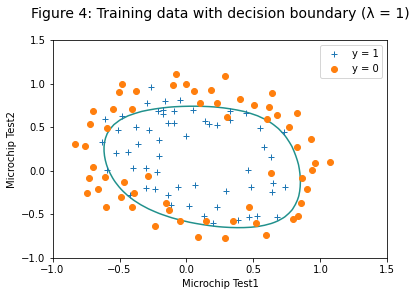

In [16]:
# this theta is with regularisation parameter lambda = 1
cost, theta = getOptimisedTheta(1)
plotDecisionBoundary(theta, X, y)

This is moderate regularisation which fits the data decently.

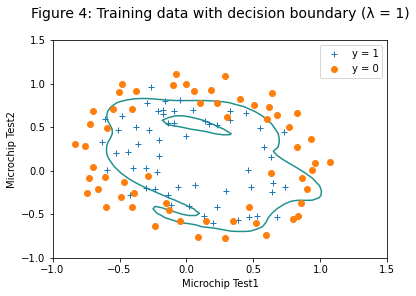

In [17]:
# Theta0 is basically without regularisation.
cost, theta = getOptimisedTheta(0);

plotDecisionBoundary(theta,X,y)

This is an example of no regularisation which causes our model to overfit the data.

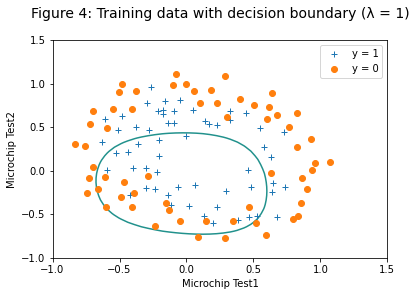

In [18]:
# theta with high regularisation
cost, theta = getOptimisedTheta(100);

plotDecisionBoundary(theta,X,y);

This is an example of high regularisation which causes the model to underfit the data.